## Prepare for the environment

In [1]:
# Load in our libraries
import pandas as pd
import numpy as np
import re
import sklearn
import xgboost as xgb
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

import warnings
warnings.filterwarnings('ignore')

# Going to use these 5 base models for the stacking
from sklearn.ensemble import (RandomForestClassifier, AdaBoostClassifier, 
                              GradientBoostingClassifier, ExtraTreesClassifier)
from sklearn.svm import SVC
from sklearn.cross_validation import KFold

## Feature Exploration, Engineering and Cleaning

In [2]:
trainDF=pd.read_csv("train.csv")
# observe the data
trainDF.head(3)

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0


In [3]:
# get a list of all the independent variables
cols=[c for c in trainDF.columns if 'X' in c]
# use data types to check how many quantitative variables and how many categorical variables
trainDF[cols].dtypes.value_counts()

int64     368
object      8
dtype: int64

We havev 368 quantitative variables and 8 categorical variables 

In [4]:
independent_columns=list(set(trainDF.columns) - set(['ID', 'y']))
y_train=trainDF['y'].values
x_train=trainDF[independent_columns]
testDF=pd.read_csv("test.csv")
x_test=testDF[independent_columns]

In [5]:
# Feature engineering steps for categorical variables
for column in independent_columns:
    cardinality=len(np.unique(x_train[column]))
    if cardinality==1:
        x_train.drop(column,axis=1)
        x_test.drop(column,axis=1)
    if cardinality>2:
        mapper = lambda x: sum([ord(digit) for digit in x])
        x_train[column]=x_train[column].apply(mapper)
        x_test[column]=x_test[column].apply(mapper)

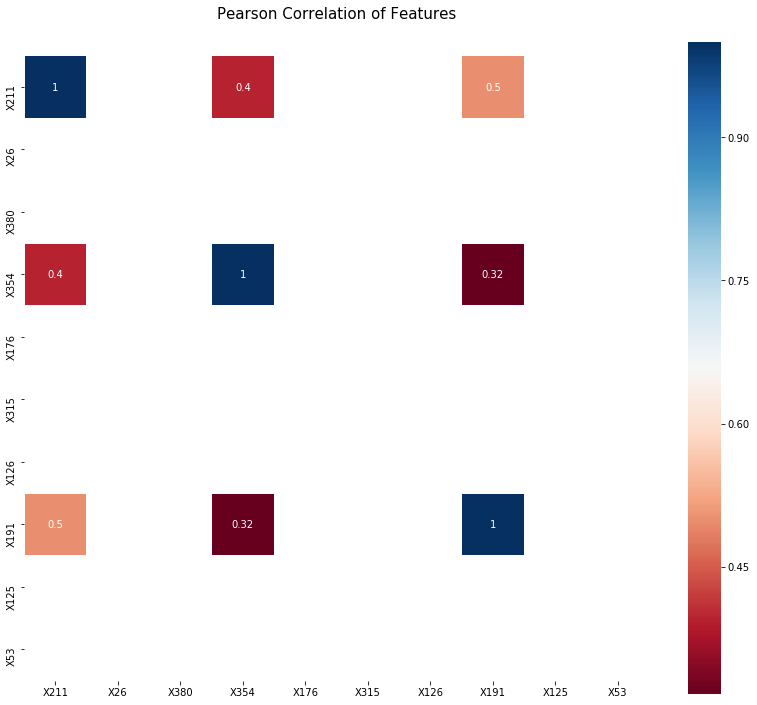

In [27]:
# Two useful tools in feature engineering
# Correlation matrix
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(x_train.iloc[1:10,15:25].astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

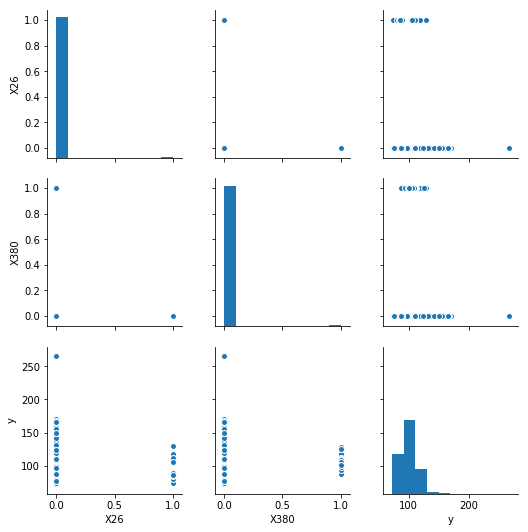

In [37]:
# pairplot
pairdf=trainDF.loc[:,['X26','X380','y']]
sns.pairplot(pairdf)